# Lab 6: Análisis Estadístico de Trenes de Spike

## Introducción

Las neuronas de la retina suelen responder a patrones de luz que se muestran en pequeñas secciones del campo visual. Sin embargo, cuando las neuronas de la retina se cultivan y se mantienen bajo condiciones ambientales y de luz constantes, seguirán disparando espontáneamente potenciales de acción. En una retina en pleno funcionamiento, esta actividad espontánea a veces se describe como actividad de fondo, que se modula en función de los estímulos visuales. Es útil comprender las propiedades de esta actividad de fondo para determinar en experimentos futuros cómo estas propiedades de activación se ven afectadas por estímulos específicos.

## Caso de Estudio

Una investigadora que examina las propiedades de actividad de fondo de una de estas neuronas se comunica con usted para discutir sus datos. Su colaboradora ha registrado los potenciales de acción en dos condiciones experimentales: con las luces de la habitación apagadas (niveles bajos de luz ambiental) o con las luces encendidas (niveles altos de luz ambiental). A ella le gustaría colaborar con usted para determinar si existe una diferencia en el disparo de fondo entre estas dos condiciones. El registro de actividad neuronala se ha hecho durante 30 segundos en cada condición.

## Ejercicio 1

Cargue los datos en python para su procesamiento. Para ello use el módulo scipy.io la función loadmat.

Debería encontrar dos variables en el diccionario de datos:

*SpikesLow*: tiempos de disparo durante 30 s en condiciones de poca luz,

*SpikesHigh*: tiempos de disparo durante 30 s en condiciones de luz alta.

**Q:** Cuál es el firing rate promedio en de la neurona en condiciones de luz baja y de luz ambiental?

Firing rate en luz baja: 25.00 spikes/segundo
Firing rate luz alta: 32.30 spikes/segundo


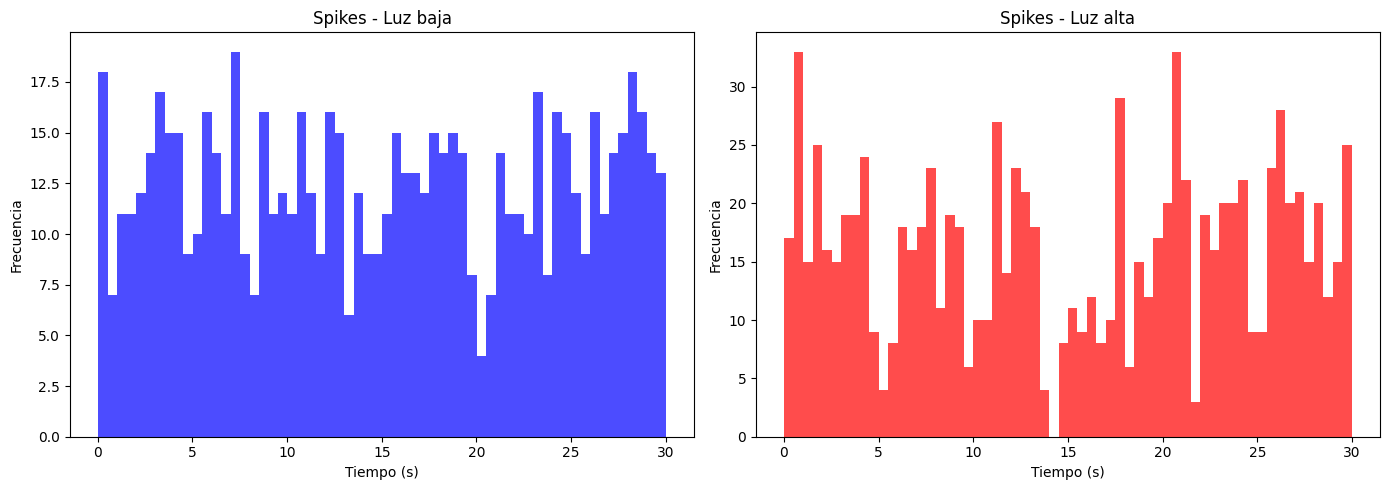

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = scipy.io.loadmat('08_spikes-1.mat')

#Extraer variables
spikes_low = data['SpikesLow'].flatten()
spikes_high = data['SpikesHigh'].flatten()

# Calcular firing rates
firing_rate_low = len(spikes_low) / 30.0
firing_rate_high = len(spikes_high) / 30.0

print(f"Firing rate en luz baja: {firing_rate_low:.2f} spikes/segundo")
print(f"Firing rate luz alta: {firing_rate_high:.2f} spikes/segundo")

# Graficar distribución temporal

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(spikes_low, bins=60, color='blue', alpha=0.7)
ax1.set_title('Spikes - Luz baja')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Frecuencia')

ax2.hist(spikes_high, bins=60, color='red', alpha=0.7)
ax2.set_title('Spikes - Luz alta')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Solución 1:

Tasa de disparo (firing rate):
  - Luz baja: 25 spikes/segundo
  - Luz alta: 32.3 spikes/segundo

El estímulo más iluminado incrementa la tasa de disparo de la neurona alrededor de 29%, es decir que la célula responde más activamente a la luz intensa.

### Histogramas

- El histograma de luz baja muestra una frecuencia más homogénea, sin picos muy altos.

- El histograma de la luz alta muestra momentos con ráfagas más variados, con picos altos seguido de picos bajos, por lo que refleja una modulación más compleja (Picos transitorios ó adaptación)

## Ejercicio 2

Habrá notado que en nuestro experimento se nos da simplemente los tiempos de disparo. Para visualizar los tiempos de disparo se suele representar a través de un raster-plot. En este se muestra en el eje horizontal los tiempos de disparo y en el eje vertical se grafica el índice de la neurona que emitió dicho disparo. En este experimeto tenemos solo una neurona pero bajo dos experimentos distintos así que pues al eje vertical se le puede asignar el índice 1 (para el experimento de poca luz) y 2 (para el de luz alta)

Haga el raster plot para las dos condiciones experimentales.

**Q** Encuentra alguna diferencia cualitativa entre el disparo de la neurona en ambas condiciones experimentales?

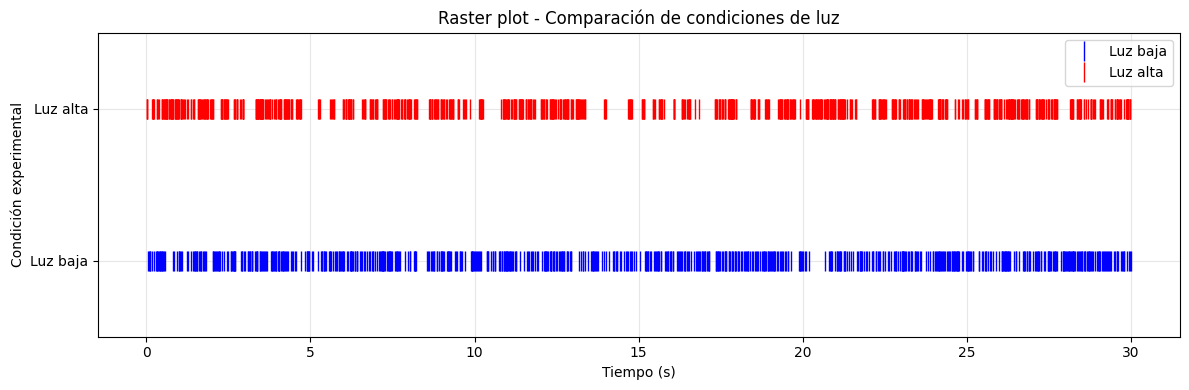

In [ ]:
# Raster plot
plt.figure(figsize=(12, 4))

# Luz baja (índice 1 en el eje Y)
plt.plot(spikes_low, np.ones_like(spikes_low), '|', color='blue', markersize=15, label='Luz baja')

# Luz alta (índice 2 en el eje Y)
plt.plot(spikes_high, 2 *  np.ones_like(spikes_high), '|', color='red', markersize=15, label='Luz alta')

# Graficar
plt.yticks([1, 2], ['Luz baja', 'Luz alta'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Condición experimental')
plt.title('Raster plot - Comparación de condiciones de luz')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.5, 2.5)
plt.tight_layout()
plt.show()

# Solución 2:

Si hay diferencia cualitativa:

 - Luz baja:
    - Los disparos son más regulares y espaciados
    - Se observa una cadencia más uniforme, sin grandes agrupaciones ni silencios prolongados.
    - (Ritmo basal ó actividad estable)
  - Luz alta:
    - Los disparos son más densos y agrupados en ráfagas.
    - Hay períodos cortos con alta actividad y otros más silenciosos, indicando variabilidad temporal.
    - La neurona responde deforma más dinámica.

  La neurona codifica la intensidad de luz no solo con la cantidad total de spikes (firing rate), sino también con el patrón temporal de los disparos.

  En general:

  La luz baja:
    - Tiene una frecuencia menos (~25 Hz)
    - Regularidad alta (Intérvalos similares)
    - Tipo de respuesta: Basal/tónica
  
  La luz alta:
    - Mayor frecuencia global (~32 Hz)
    - Baja regularidad (Ráfagas y silencios)
    - Un tipo de respuesta exitatoria - fásica

## Ejercicio 3

Compute la distribución de los ISI para ambos experimentos. Esto le debe permitir determinar con más claridad las diferencias entre la estadística de disparo de la neurona en ambos experimentos.

**Q** Describa las características de los dos histogramas. ¿Qué características de las distribuciones ISI son similares para las dos condiciones? ¿Qué características son diferentes?

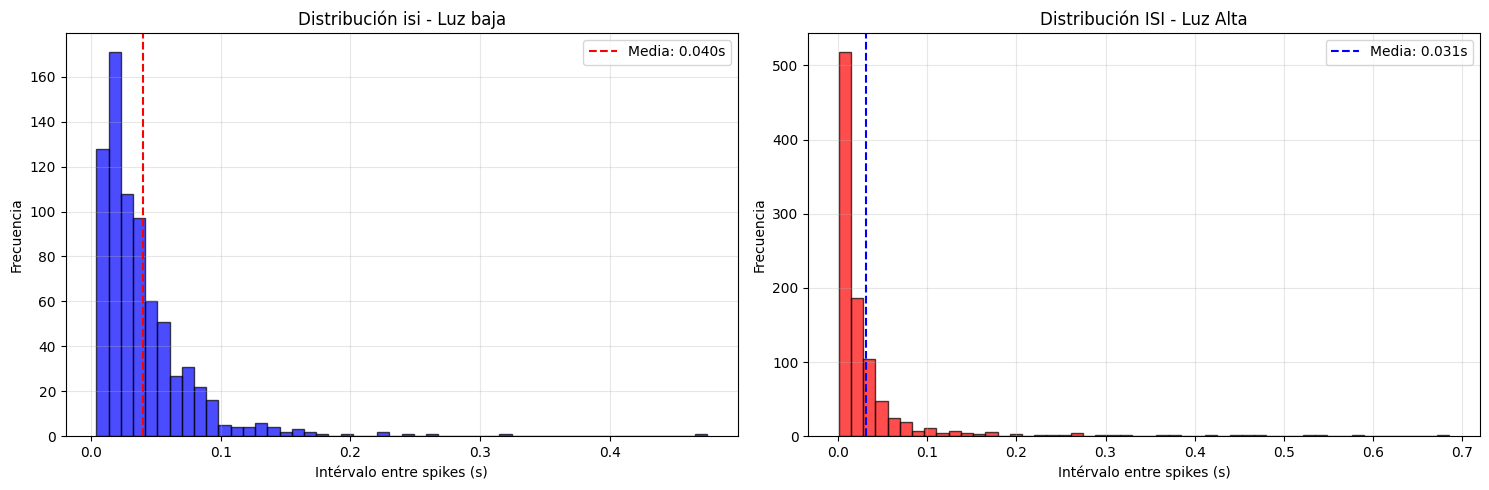

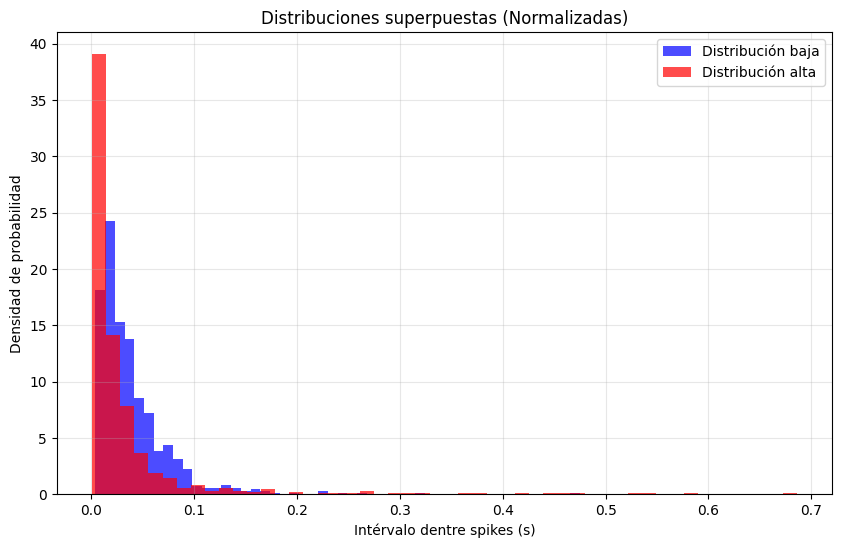

In [ ]:
# Calcular los isi

isi_low = np.diff(spikes_low)
isi_high = np.diff(spikes_high)

# Histogramas

plt.figure(figsize=(15, 5))

# Histograma de luz baja

plt.subplot(1, 2, 1)
plt.hist(isi_low, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución isi - Luz baja')
plt.xlabel('Intérvalo entre spikes (s)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

mean_low = np.mean(isi_low)
std_low = np.std(isi_low)
plt.axvline(mean_low, color='red', linestyle='--', label=f'Media: {mean_low:.3f}s')
plt.legend()

# Histograma de luz alta

plt.subplot(1,2,2)
plt.hist(isi_high, bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title('Distribución ISI - Luz Alta')
plt.xlabel('Intérvalo entre spikes (s)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

mean_high = np.mean(isi_high)
std_high = np.std(isi_high)
plt.axvline(mean_high, color='blue', linestyle='--', label=f'Media: {mean_high:.3f}s')
plt.legend()

plt.tight_layout()
plt.show()

# Superponer histogramas
plt.figure(figsize=(10, 6))
plt.hist(isi_low, bins=50, color='blue', alpha=0.7, density=True, label='Distribución baja')
plt.hist(isi_high, bins=50, color='red', alpha=0.7, density=True, label='Distribución alta')
plt.title('Distribuciones superpuestas (Normalizadas)')
plt.xlabel('Intérvalo dentre spikes (s)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


#Solución 3:

Distribución ISI de la luz baja:

  - Media = 0.040 s (40 ms)
  - Distribución asimétrica hacia la derecha (cola larga), disparo irregular pero con ritmo moderadamente estable.
  - Mayor dispersión (Algunos intérvalos grandes entre spikes), indica una actividad

Distribución ISI de la luz alta:

  - Media = 0.031 s (31 ms)
  - Distribución más centrada en valores bajos. (La mayoría de los intérvalos son más cortos)
  - Menor dispersión: La neurona dispara más frecuentemente y con menos pausas. Indica una ctividad exitatoria con intérvalos pequeños.

Conclusiones:

  - El ISI medio indica disparos más frecuentes bajo luz alta.
  - La variabilidad ISI indica disparos más regulares en luz alta.
  - El faring rate aumenta en luz alta.
  - Como la luz baja tiene un tipo de patrón tónico y la alta un típo más fásico(Excitado), podemos decir que la activación es dependiente de la luz.

Interpretaciones fisiológicas:

  - La neurona muestra una respuesta excitatoria al aumento de la intensidad de la luz, disparando más rápido y de forma más constante.
  - El ISI más corto y concentrado implica una mayor sincronización ó excitación de la célula ante el estímulo.
  - El ISI más largo y viable en luz baja indica un estado basal, con disparos espontáneos y sin fuerte modulación sensorial.

## Ejercicio 4:

Una forma común de determinar la variabilidad en el disparo de una neurona es através del coeficiente de variación del ISI definido como

$$
CV(ISI) = \frac{\sigma(ISI)}{\mu(ISI)}
$$

Una regla general para interpretar el CV es el siguiente

* $CV \approx 0$, el disparo es regular -Disparo Tónico-
* $CV \approx 1$, el disparo es irregular, parece completamente aleatorio -Proceso de Poisson-
* $CV > 1$, el disparo es de tipo Bursting, la neurona emite "ráfagas" de spikes en un periodo corto, y se queda sin disparar durante un periodo largo

Calcule el CV para los dos experimentos

**Q** Qué tipo de disparo hay en cada uno de los dos experimentos?

In [ ]:
# Análisis de los ISI

def interpretar_cv(cv):
  if cv < 0.3:
    print(f' CV = {cv:.3f} -> DISPARO REGULAR (tónico)')
    print(" La neurona dispara de manera muy regular y constante")
  elif 0.3 <= cv < 0.7:
    print(f' CV = {cv:.3f} -> DISPARO MODERADAMENTE REGULAR')
    print(' Patrón intermedio entre regular y aleatorio')
  elif 0.7 <= cv <= 1.3:
    print(f' CV = {cv:.3f} -> PROCESO DE POISSON (aleatorio)')
    print(' Disparo irregular, similar a proceso aleatorio')
  elif 1.3 <= cv <= 2.0:
    print(f' CV = {cv:.3f} -> DISPARO BURSTING MODERADO')
    print(' La neurona muestra ráfagas moderadas de spikes')
  else:
    print(f' CV = {cv:.3f} -> DISPARO BURSTING FUERTE')
    print(' Ráfagas seguidas de largos períodos de reposo')

cv_low = std_low / mean_low
cv_high = std_high / mean_high

print('# Luz baja')
print(f' - Número de ISI: {len(isi_low)}')
print(f' - Coeficiente de variación: {std_low/mean_low:.3f}')
print(f' - ISI mínimo: {np.min(isi_low):.3f} s')
print(f' - ISI máximo: {np.max(isi_low):.3f} s')
print(f' - Media: {mean_low:.3f} s')
interpretar_cv(cv_low)
print('\n')

print('# Luz alta')
print(f' - Número de ISI: {len(isi_high)}')
print(f' - Media: {mean_high:.3f} s')
print(f' - ISI mínimo: {np.min(isi_high):.3f} s')
print(f' - ISI máximo: {np.max(isi_high):.3f} s')
print(f' - Coeficiente de variación: {std_high/mean_high:.3f}')
interpretar_cv(cv_high)
print('\n')


# Luz baja
 - Número de ISI: 749
 - Coeficiente de variación: 0.964
 - ISI mínimo: 0.004 s
 - ISI máximo: 0.475 s
 - Media: 0.040 s
 CV = 0.964 -> PROCESO DE POISSON (aleatorio)
 Disparo irregular, similar a proceso aleatorio


# Luz alta
 - Número de ISI: 968
 - Media: 0.031 s
 - ISI mínimo: 0.001 s
 - ISI máximo: 0.686 s
 - Coeficiente de variación: 2.022
 CV = 2.022 -> DISPARO BURSTING FUERTE
 Ráfagas seguidas de largos períodos de reposo




# Solución 6:

Luz baja:
 - Proceso tipo poisson / Disparo irregular (tónico-aleatorio).
 cv = 0.964 (~1) indica variabilidad alta acorde a un proceso de poisson; ISI medio = 40 ms y la distribución tiene cola derecha. La neurona dispara de manera irregular, sin ráfagas marcadas.

Luz alta:
  - Bursting fuerte.
  cv = 2.02 (> 2 en el umbral) indica alta irregularidad y ráfagas intercaladas con períodos largos de silencio; ISI medio menor (31 ms) pero con muchos ISI muy cortos y algunos muy largos.

## Ejercicio 5

Otro enfoque común para analizar datos de picos es discretizar el tiempo en intervalos de ancho fijo y contar el número de eventos -spikes- que ocurren en cada intervalo de tiempo. La secuencia de conteo de picos en todos los intervalos a veces se denomina proceso de incremento del tren de spikes. Cuando los intervalos de tiempo son lo suficientemente pequeños, digamos 1 ms, el proceso de incremento resultante es solo una secuencia de ceros y unos.

Cuente los eventos que hay en cada intervalos de 50ms para los dos experimentos.

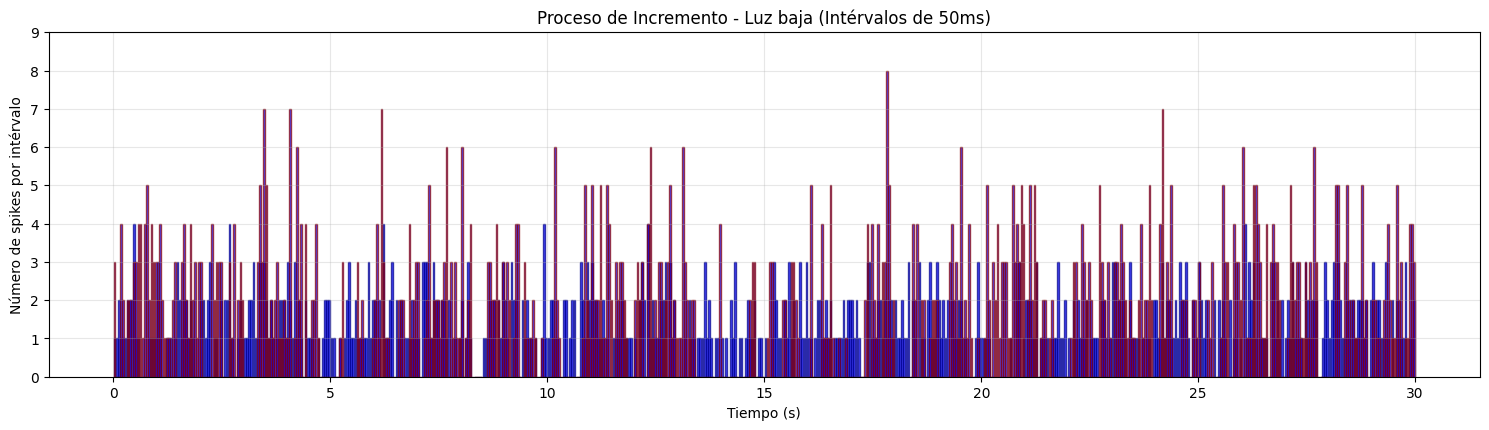

In [ ]:
bin_time = 0.050 # 50ms
total_time = 30  # 30ms

# Intérvalos de tiempo
n_bins = int(total_time / bin_time)
time_bins = np.linspace(0, total_time, n_bins + 1)

def count_spikes_in_bins(spike_times, bins):
  counts, _ = np.histogram(spike_times, bins=bins)
  return counts

# Spikes de cada experimento
counts_low = count_spikes_in_bins(spikes_low, time_bins)
counts_high = count_spikes_in_bins(spikes_high, time_bins)

# Tiempo para el eje x (centro de cada intérvalo)
time_centers = (time_bins[:-1] + time_bins[1:]) / 2

# Visualizar los procesos de incremento
plt.figure(figsize=(15, 8))

# Graficar proceso de incremento de la luz baja
plt.subplot(2, 1, 1)
plt.bar(time_centers, counts_low, width=bin_time*0.8, color='blue', alpha=0.7, edgecolor='darkblue')
plt.title('Proceso de Incremento - Luz baja (Intérvalos de 50ms)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Número de spikes por intérvalo')
plt.grid(True, alpha=0.3)
plt.ylim(0, max(max(counts_low), max(counts_high)) + 1)

# Graficar proceso de incremento de la luz alta
plt.subplot(2, 1, 1)
plt.bar(time_centers, counts_high, width=bin_time*0.8, color='blue', alpha=0.7, edgecolor='darkred')
plt.title('Proceso de Incremento - Luz baja (Intérvalos de 50ms)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Número de spikes por intérvalo')
plt.grid(True, alpha=0.3)
plt.ylim(0, max(max(counts_low), max(counts_high)) + 1)

plt.tight_layout()
plt.show()


Otra medida de variabilidad de disparo se puede calcular con el proceso de incremento usando el factor de Fano muestral (FF). Es fácil definir el factor de Fano: FF es la varianza muestral del proceso incremental dividida por la media muestral del proceso incremental.

$$
FF = Var(X)/\mu(X)
$$

Al igual que con el CV, el Factor de Fano tiene interpretaciones similares

* $FF \approx 0$, el disparo es regular -Disparo Tónico-
* $FF \approx 1$, el disparo es irregular, parece completamente aleatorio -Proceso de Poisson-
* $FF > 1$, el disparo es de tipo Bursting, la neurona emite "ráfagas" de spikes en un periodo corto, y se queda sin disparar durante un periodo largo

**Q** Calucle el factor de Fano para el proceso de incremento calculado en ambas condiciones


Factor Fano de la luz baja
PROCESO DE POISSON (aleatorio)


Factor Fano de la luz alta
DISPARO BURSTING MODERADO




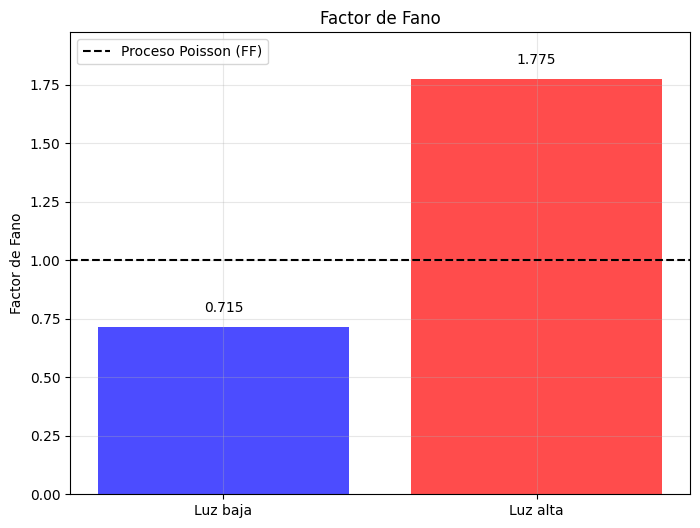

In [ ]:
# Factor FANO

ff_low = np.var(counts_low) / np.mean(counts_low)
ff_high = np.var(counts_high) / np.mean(counts_high)

def interpretar_ff(ff):
  if ff < 0.3:
    print('DISPARO TÓNICO (regular)')
  elif 0.3 <= ff < 0.7:
    print('DISPARO MODERADAMENTE REGULAR')
  elif 0.7 <= ff < 1.3:
    print('PROCESO DE POISSON (aleatorio)')
  elif 1.3 <= ff < 2.0:
    print('DISPARO BURSTING MODERADO')
  else:
    print('DISPARO BURSTING FUERTE')

print('Factor Fano de la luz baja')
interpretar_ff(ff_low)
print('\n')

print('Factor Fano de la luz alta')
interpretar_ff(ff_high)
print('\n')

valores_ff = [ff_low, ff_high]

# Graficar el factor fano
plt.figure(figsize=(8, 6))
bars = plt.bar(['Luz baja', 'Luz alta'], valores_ff, color=['blue', 'red'], alpha=0.7)

# Líneas de poisson
plt.axhline(y=1.0, color='black', linestyle='--', label='Proceso Poisson (FF)')
plt.ylabel('Factor de Fano')
plt.title('Factor de Fano')
plt.grid(True, alpha=0.3)

for bar, valor in zip(bars, valores_ff):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{valor:.3f}', ha='center', va='bottom')

plt.legend()
plt.ylim(0, max(valores_ff) + 0.2)
plt.show()

# Solución 6:

El factor de Fano (FF) cuantifica la variabilidad del disparo neuronal mediante la razón entre la varianza y la media del número de spikes.

- Un valor cercano a 1 indica un proceso Poisson (aleatorio).

- Valores menores a 1 corresponden a disparos regulares (más predecibles).

- Valores mayores a 1 reflejan actividad bursting, donde los spikes tienden a agruparse.

### En este caso:

- Luz baja (FF = 0.715): disparo aleatorio, tipo Poisson.

- Luz alta (FF = 1.775): disparo bursting moderado, con mayor sincronía y excitabilidad.